In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Load the exported Nuclei measurements CSV
df = pd.read_csv("Nuclei_MeasurementsNuclei.csv")

# Drop non-numeric columns and missing values
features = df.select_dtypes(include='number').dropna(axis=1)

print("Shape of data:", features.shape)

Shape of data: (2529, 113)



Basic Stats:
                                       count         mean          std   min  \
ImageNumber                           2529.0   119.433768    64.670193   1.0   
ObjectNumber                          2529.0    12.236062    14.133911   1.0   
AreaShape_Area                        2529.0   510.756425   390.396072  79.0   
AreaShape_BoundingBoxArea             2529.0   792.092131   574.382547  99.0   
AreaShape_BoundingBoxMaximum_X        2529.0   259.904705   136.408481  13.0   
...                                      ...          ...          ...   ...   
Texture_SumVariance_Protein_3_03_256  2529.0  1462.659394  1740.490509   0.0   
Texture_Variance_Protein_3_00_256     2529.0   701.796408   807.087946   0.0   
Texture_Variance_Protein_3_01_256     2529.0   709.081176   813.548499   0.0   
Texture_Variance_Protein_3_02_256     2529.0   703.977866   811.016390   0.0   
Texture_Variance_Protein_3_03_256     2529.0   703.686321   810.475977   0.0   

                         

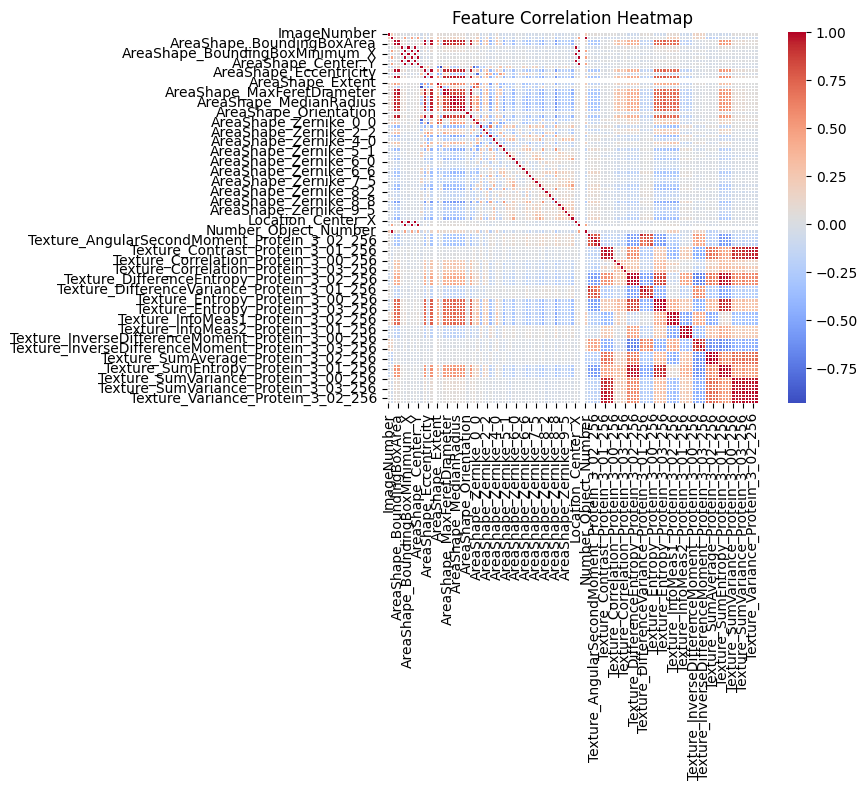

In [3]:
# Summary Statistics
print("\nBasic Stats:")
print(features.describe().T)

# Feature Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

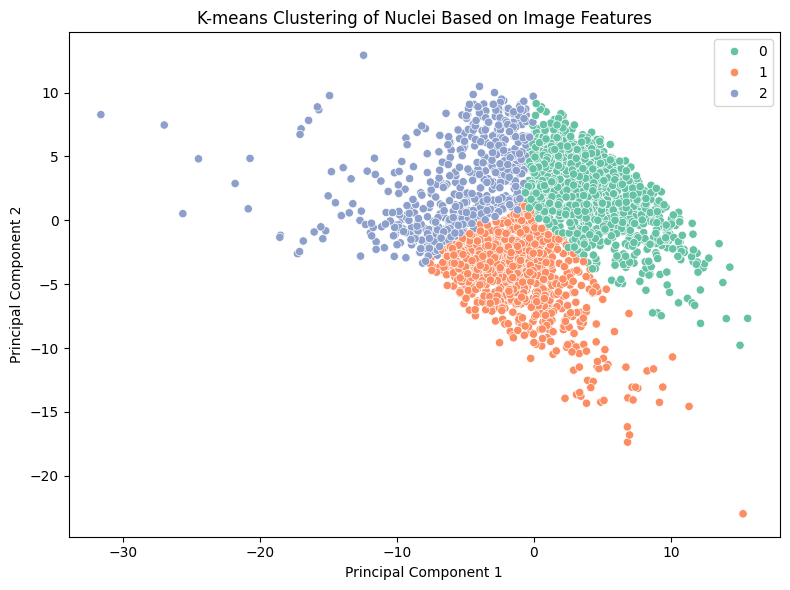

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load CSV
df = pd.read_csv("Nuclei_MeasurementsNuclei.csv")

# Select numeric features only and drop missing columns
features = df.select_dtypes(include='number').dropna(axis=1)

# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc[:, 0], y=pc[:, 1], hue=clusters, palette="Set2")
plt.title("K-means Clustering of Nuclei Based on Image Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()
